<a href="https://colab.research.google.com/github/webjjang/data_anal/blob/main/ch06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
# 해상도 설정
plt.rcParams["figure.dpi"] = 100

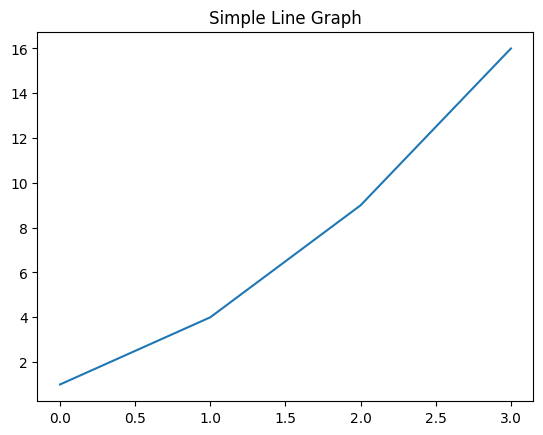

In [2]:
# 샘플데이터
plt.plot([1, 4, 9 ,16])
# 그래프 제목
plt.title("Simple Line Graph")
plt.show()

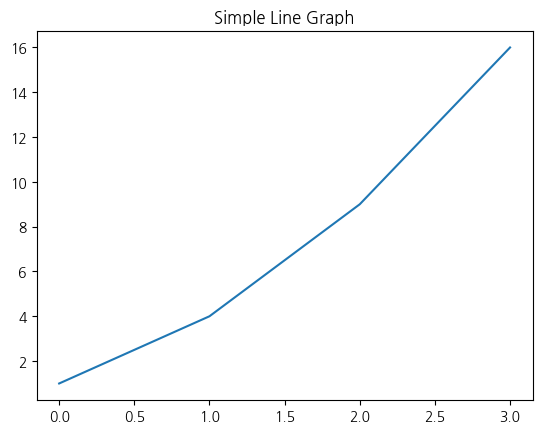

In [22]:
# 객체 지향 API  방식으로 그래프 그리기
# plt 안에 plot을 꺼내면 subplut들로 처리된다.
fig, ax = plt.subplots()
ax.plot([1, 4, 9 ,16])
ax.set_title("Simple Line Graph")
plt.show()

In [23]:
import sys
# 코랩에서 실행될 때 코랩의 리눅스 시스템에 처리 - 글꼴 등록
if "google.colab" in sys.modules:
    print("구글 코랩에서 실행 중입니다.")
    # 리눅스 확인
    !echo "debconf debconf/frontend select Noninteractive" | \
    debconf-set-selections
    # 나눔 폰트를 설치합니다.
    # 리눅스 처리문 - 관리자 권한 처리 : sudo
    # apt-get : 패키지 관리 명령
    # -qq : 진행 상황 최소 출력. -y : yes/no 를 물어 보면 yes로 처리해라.
    !sudo apt-get -qq -y install fonts-nanum
    # 폰트 세팅을 위해 필요한 라이브러리 import
    import matplotlib.font_manager as fm
    # 폰트 설치 진행
    font_files = fm.findSystemFonts(fontpaths=["/usr/share/fonts/truetype/nanum"])
    for fpath in font_files:
      fm.fontManager.addfont(fpath)


구글 코랩에서 실행 중입니다.


In [27]:
# 현재 사용하는 폰트 확인
plt.rcParams["font.family"]

['NanumGothic']

In [26]:
# 사용할 폰트 세팅
plt.rcParams["font.family"] = "NanumGothic"

In [28]:
print(plt.rcParams["font.family"], plt.rcParams["font.size"])

['NanumGothic'] 10.0


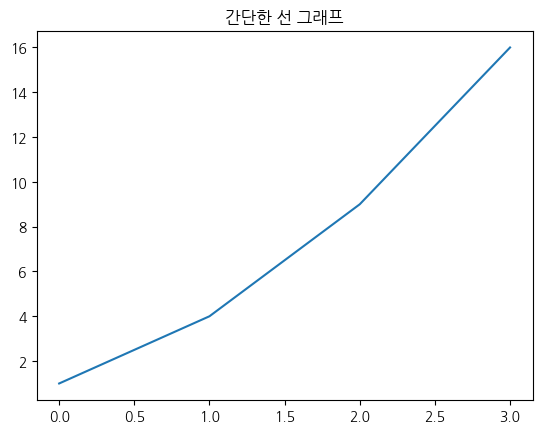

In [29]:
plt.plot([1, 4, 9 ,16])
plt.title("간단한 선 그래프")
plt.show()

In [32]:
# 작업할 데이터 준비
import gdown
gdown.download("https://bit.ly/3pK7iuu","ns_book7.csv",quiet=False)
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 178MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [34]:
# 출판사 이름이 가장 많이 나타나는 상위 30개의 데이터
top30_pubs = ns_book7["출판사"].value_counts()[:30]
top30_pubs

,count
출판사,
문학동네,4410
민음사,3349
김영사,3246
웅진씽크빅,3227
시공사,2685
창비,2469
문학과지성사,2064
위즈덤하우스,1981
학지사,1877


In [35]:
# 상의 30 안에 있는 데이터는 True로 없으면 False로 처리해 준다. : isin()
top30_pubs_idx = ns_book7["출판사"].isin(top30_pubs.index)
top30_pubs_idx

,출판사
0,True
1,False
2,False
3,False
4,True
...,...
376765,False
376766,False
376767,True
376768,False


In [36]:
# True인 데이터의 건수를 계산
top30_pubs_idx.sum()

51886

In [37]:
# 출판사 상위 30를 대상으로 처리. sample(데이터개수, random_state=시드값)
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02
